# Arima

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [3]:
data_raw = pd.read_table('data/MSFT.csv', sep=',')

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1511 non-null   object 
 1   Open       1511 non-null   float64
 2   High       1511 non-null   float64
 3   Low        1511 non-null   float64
 4   Close      1511 non-null   float64
 5   Adj Close  1511 non-null   float64
 6   Volume     1511 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.8+ KB


In [5]:
data_raw['Date'] = pd.to_datetime(data_raw['Date'])

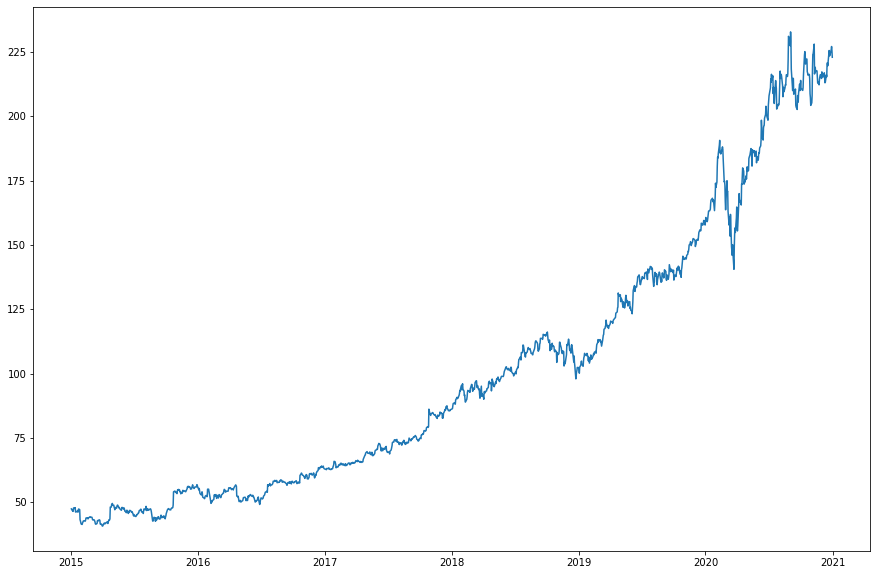

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(data_raw['Date'], data_raw['High'])

In [7]:
december_2020 = data_raw[1489:]
data_train = data_raw[:1489]

#

## Stationary / ACF Plot

In [8]:
result = adfuller(data_train['High'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.663830
p-value: 0.998037


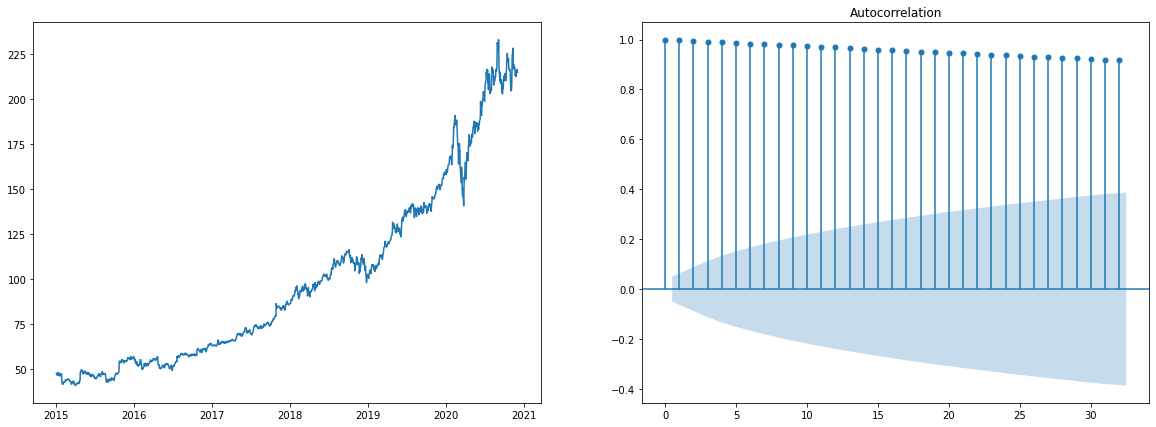

In [9]:
#original series
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
ax1.plot(data_train['Date'], data_train['High'])
plot_acf(data_train['High'], ax=ax2);

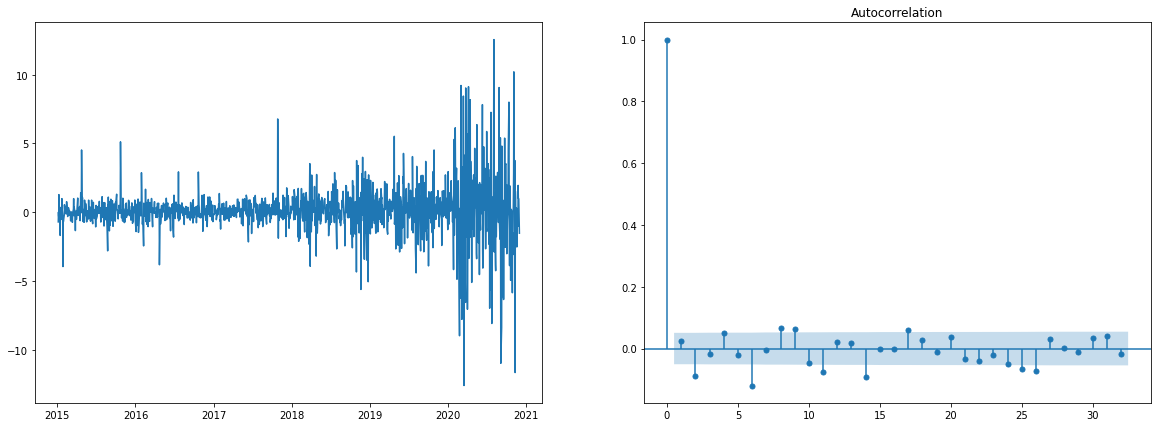

In [10]:
#first order differencing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
ax1.plot(data_train['Date'], data_train['High'].diff())
plot_acf(data_train['High'].diff().dropna(), ax=ax2);

In [11]:
result = adfuller(data_train['High'].diff().dropna())
result[1]

3.0338612348635163e-16

In [12]:
high_diff = data_train['High'].diff().dropna()

In [13]:
index = list(range(0, len(high_diff)))

#

## PACF Plot

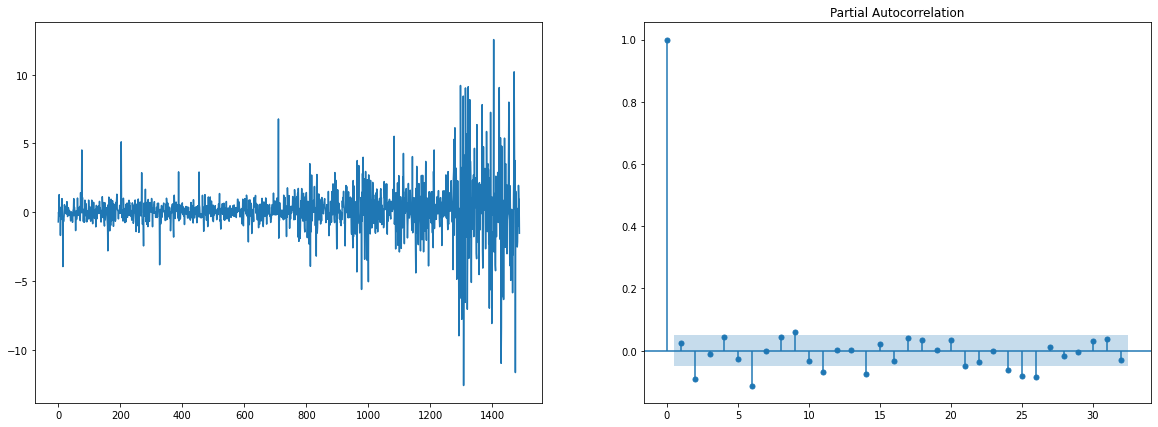

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
ax1.plot(index, high_diff)
plot_pacf(high_diff, ax=ax2);

#

**ARIMA(1,1,1)**

In [15]:
model_111 = ARIMA(data_train['High'], order=(1,1,1))
model_111_fit = model_111.fit()
model_111_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                 1489
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2933.566
Date:                Tue, 08 Jun 2021   AIC                           5873.132
Time:                        22:11:50   BIC                           5889.048
Sample:                             0   HQIC                          5879.064
                               - 1489                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9228      0.031    -29.690      0.000      -0.984      -0.862
ma.L1          0.9482      0.026     35.997      0.000       0.897       1.000
sigma2         3.0194      0.043     70.742      0.000       2.936       3.103
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              8999.49
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              14.68   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**ARIMA(2,1,1)**

In [16]:
model_211 = ARIMA(data_train['High'], order=(2,1,1))
model_211_fit = model_211.fit()
model_211_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                 1489
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2930.716
Date:                Tue, 08 Jun 2021   AIC                           5869.432
Time:                        22:11:50   BIC                           5890.653
Sample:                             0   HQIC                          5877.341
                               - 1489                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0726      0.165      0.441      0.659      -0.250       0.396
ar.L2         -0.0865      0.016     -5.358      0.000      -0.118      -0.055
ma.L1         -0.0414      0.166     -0.249      0.804      -0.367       0.285
sigma2         3.0079      0.042     72.423      0.000       2.927       3.089
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              9691.82
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):              14.78   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**ARIMA(2,1,2)**

In [17]:
model_212 = ARIMA(data_train['High'], order=(2,1,2))
model_212_fit = model_212.fit()
model_212_fit.summary()

/home/vma/Python/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/vma/Python/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                 1489
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2927.162
Date:                Tue, 08 Jun 2021   AIC                           5864.325
Time:                        22:11:51   BIC                           5890.851
Sample:                             0   HQIC                          5874.211
                               - 1489                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7305      0.007   -101.305      0.000      -0.745      -0.716
ar.L2         -0.9715      0.007   -135.713      0.000      -0.986      -0.957
ma.L1          0.7577      0.006    121.592      0.000       0.745       0.770
ma.L2          0.9865      0.006    171.734      0.000       0.975       0.998
sigma2         3.0062      0.042     71.382      0.000       2.924       3.089
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              9507.44
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              14.80   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**ARIMA(1,1,2)**

In [18]:
model_112 = ARIMA(data_raw['High'], order=(1,1,2))
model_112_fit = model_112.fit()
model_112_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                 1511
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2979.376
Date:                Tue, 08 Jun 2021   AIC                           5966.753
Time:                        22:11:52   BIC                           5988.032
Sample:                             0   HQIC                          5974.678
                               - 1511                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0914      0.170      0.537      0.591      -0.242       0.425
ma.L1         -0.0634      0.171     -0.371      0.711      -0.398       0.271
ma.L2         -0.0818      0.016     -5.218      0.000      -0.113      -0.051
sigma2         3.0292      0.042     72.015      0.000       2.947       3.112
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              9231.12
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):              14.83   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#

## Residual error plot

In [19]:
residuals = model_212_fit.resid[1:]

(array([0.00053704, 0.00053704, 0.00053704, 0.00107407, 0.00107407,
        0.00322221, 0.00429628, 0.01235181, 0.02255547, 0.09290707,
        0.44735022, 0.14983279, 0.03705542, 0.01020367, 0.00751849,
        0.00214814, 0.00161111, 0.00268518, 0.00107407, 0.00053704]),
 array([-13.16980215, -11.91840715, -10.66701215,  -9.41561714,
         -8.16422214,  -6.91282713,  -5.66143213,  -4.41003713,
         -3.15864212,  -1.90724712,  -0.65585212,   0.59554289,
          1.84693789,   3.0983329 ,   4.3497279 ,   5.6011229 ,
          6.85251791,   8.10391291,   9.35530791,  10.60670292,
         11.85809792]),
 <BarContainer object of 20 artists>)

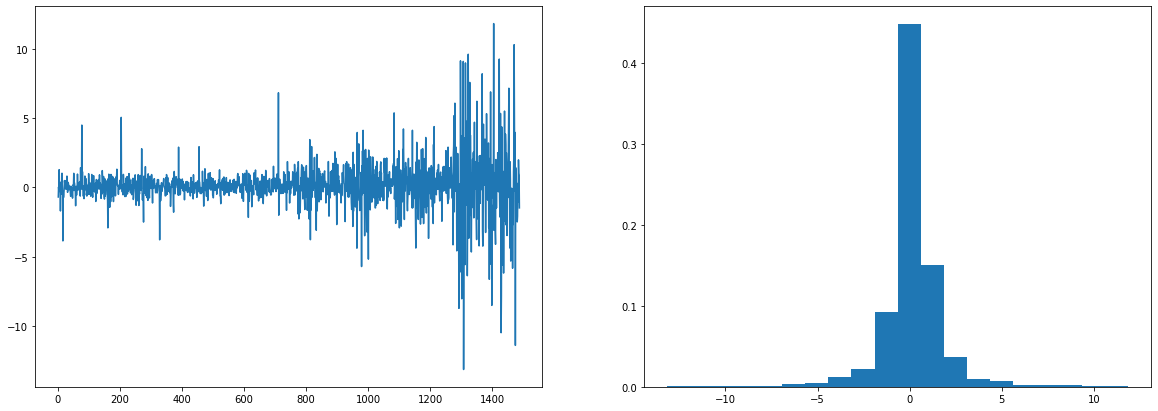

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
ax1.plot(residuals)
ax2.hist(residuals, bins=20, density=True)

#

## Forecasting

In [21]:
model_212_forecast = model_212_fit.get_forecast(steps=22).summary_frame(alpha=0.05)
model_212_forecast

High,mean,mean_se,mean_ci_lower,mean_ci_upper
1489,214.671400,1.733841,211.273134,218.069666
1490,214.744939,2.485570,209.873312,219.616566
1491,214.777288,3.052908,208.793698,220.760879
1492,214.682215,3.510458,207.801844,221.562586
1493,214.720238,3.931455,207.014728,222.425748
1494,214.784825,4.316254,206.325123,223.244527
1495,214.700706,4.652687,205.581608,223.819805
1496,214.699409,4.973876,204.950791,224.448026
1497,214.782077,5.284801,204.424057,225.140096
1498,214.722949,5.565480,203.814809,225.631089


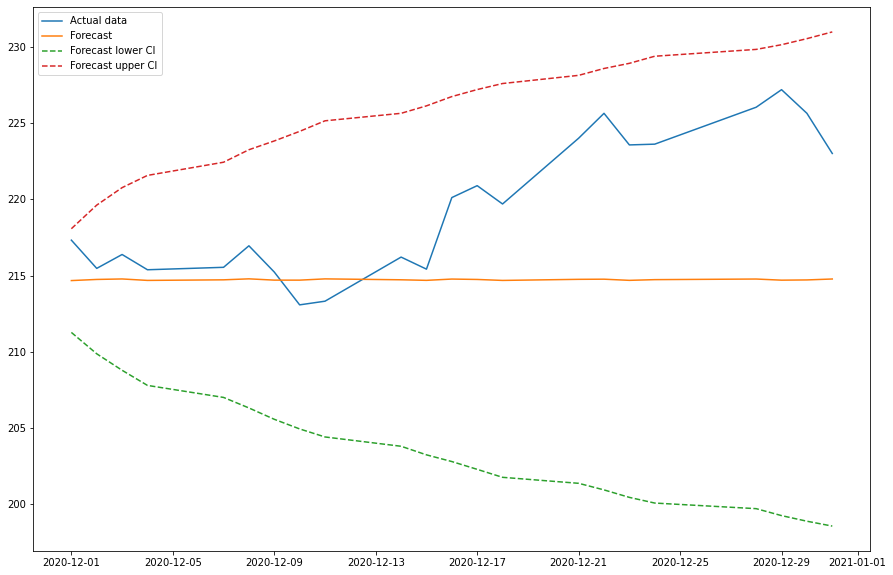

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(december_2020['Date'], december_2020['High'], label='Actual data')
plt.plot(december_2020['Date'], model_212_forecast['mean'], label='Forecast')
plt.plot(december_2020['Date'], model_212_forecast['mean_ci_lower'], ls='--', label='Forecast lower CI')
plt.plot(december_2020['Date'], model_212_forecast['mean_ci_upper'], ls='--', label='Forecast upper CI')
plt.legend()